## Observations and Insights 

Observations

1. The testing seems to have been well planned out, with each drug having close to the same number of mice tested, and roughly the same amount of time, as well as a near 50/50 distribution of males and females.

2. There is a strong correlation between weight and the size of the tumor. 

3. Capomulin and Ramicane seem to be the most effective, having a much lower average tumor volume by the end of treatment than all the others, even the other two 'top' drugs tested.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mousedata_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

# Read the mouse data and the study results
mousedata = pd.read_csv(mousedata_path)
studydata = pd.read_csv(study_path)

# Combine the data into a single dataset
data = pd.merge(mousedata, studydata, how="outer", on="Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = data["Mouse ID"].unique()
micecount = len(mice)

print(micecount)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data[data.duplicated(['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data[data["Mouse ID"] != "g989"]
data
#print(len(data["Mouse ID"].unique()))

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(data["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

regmean = data.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
regmedian = data.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
regvar = data.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
regstd = data.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
regsem = data.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
regimentable = pd.DataFrame({"Mean": regmean, 'Median': regmedian, 'Variance': regvar, 'STD': regstd, 'SEM': regsem})
regimentable


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

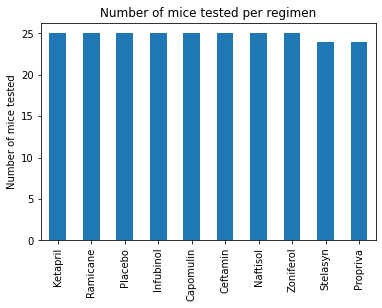

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
miceind = data.drop_duplicates('Mouse ID')

miceind['Drug Regimen'].value_counts().plot.bar()
plt.ylabel('Number of mice tested')
plt.title('Number of mice tested per regimen')
plt.show()

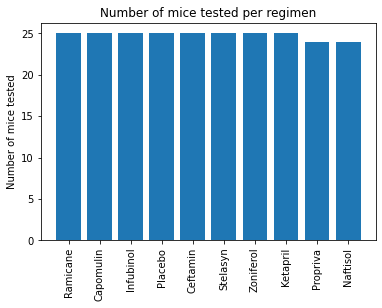

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugreg = miceind['Drug Regimen'].unique()
regcount = miceind['Drug Regimen'].value_counts()

plt.bar(drugreg, regcount)
plt.xticks(rotation=90)
plt.ylabel('Number of mice tested')
plt.title('Number of mice tested per regimen')
plt.show()

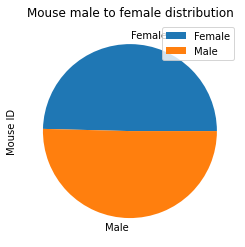

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

miceind.groupby('Sex').count().plot.pie(y='Mouse ID')
plt.title('Mouse male to female distribution')
plt.show()

Male      125
Female    123
Name: Sex, dtype: int64


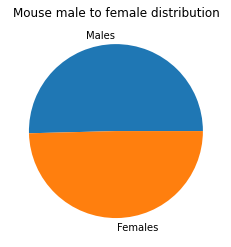

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Males", "Females"]
gendercounts = miceind['Sex'].value_counts()
print(gendercounts)

plt.pie(gendercounts, labels=labels)
plt.title('Mouse male to female distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = data.groupby('Mouse ID').max()['Timepoint']
lastpointdf = pd.DataFrame(lasttimepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
endingsize = pd.merge(lastpointdf, data, how='inner', on=("Mouse ID","Timepoint"))

endingsize

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:

# Put treatments into a list for for loop (and later for plot labels)

### check the top 4 regimens (one of them doesn't match the list given in the instructions, so I'll be using the ones in the instructions)
bestdrugs = endingsize.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
actualbestdrugs = bestdrugs.sort_values(ascending=True).head(4)

### instructions best treatments
drugnames = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

### dataframes for top 4 drugs
capo = endingsize[endingsize['Drug Regimen']=='Capomulin']
rami = endingsize[endingsize['Drug Regimen']=='Ramicane']
infu = endingsize[endingsize['Drug Regimen']=='Infubinol']
ceft = endingsize[endingsize['Drug Regimen']=='Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

### get each drugs tumor values
capovol = capo['Tumor Volume (mm3)'].reset_index(drop=True)
ramivol = rami['Tumor Volume (mm3)'].reset_index(drop=True)
infuvol = infu['Tumor Volume (mm3)'].reset_index(drop=True)
ceftvol = ceft['Tumor Volume (mm3)'].reset_index(drop=True)

### combine all four into single df
tumorvol = pd.DataFrame({'Capomulin': capovol, 'Ramicane': ramivol,'Infubinol': infuvol, 'Ceftamin': ceftvol})

### upper/lower bounds
quantiles = tumorvol.quantile([.25, .5, .75])

# Determine outliers using upper and lower bounds
for column, row in quantiles.items():
    print(f'The lower bound for {column} is {row[.25].round(1)}, and the upper bound is {row[.75].round(1)}.')
quantiles


The lower bound for Capomulin is 32.4, and the upper bound is 40.2.
The lower bound for Ramicane is 31.6, and the upper bound is 40.7.
The lower bound for Infubinol is 54.0, and the upper bound is 65.5.
The lower bound for Ceftamin is 48.7, and the upper bound is 64.3.


,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.50,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830


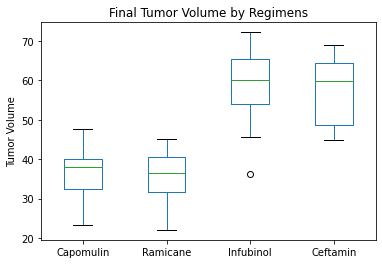

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumorvol.plot.box()
plt.ylabel('Tumor Volume')
plt.title('Final Tumor Volume by Regimens')
plt.show()

## Line and Scatter Plots

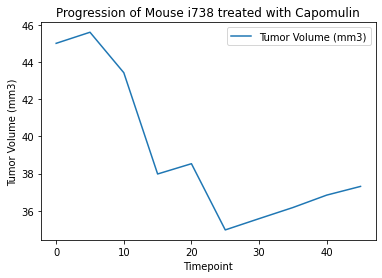

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

i783 = data.loc[data['Mouse ID'] == 'i738']
i783.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Progression of Mouse i738 treated with Capomulin')
plt.show()


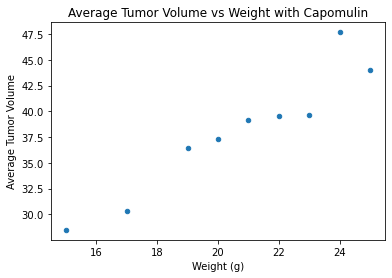

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

wgt = capo.groupby(['Weight (g)']).mean()['Tumor Volume (mm3)']
wgtser = pd.DataFrame(wgt)
wgtdf = wgtser.reset_index()
wgtdf.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume vs Weight with Capomulin')
plt.show()

## Correlation and Regression

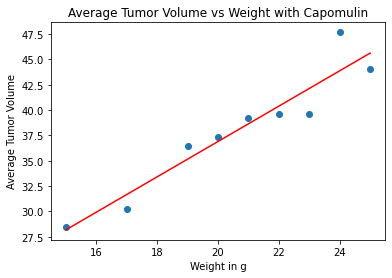

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

wgt = capo.groupby(['Weight (g)']).mean()['Tumor Volume (mm3)']
wgtser = pd.DataFrame(wgt)
wgtdf = wgtser.reset_index()

xval = wgtdf['Weight (g)']
yval = wgtdf['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xval, yval)
regress_val = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xval, yval)
plt.plot(xval,regress_val,'r-')
plt.xlabel('Weight in g')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume vs Weight with Capomulin')
plt.show()